# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [2]:
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)

In [3]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


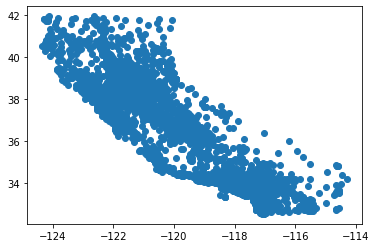

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

In [5]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [6]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


## K-Means Cluster Sayısını Belirleme - Inertia

In [7]:
from sklearn.cluster import KMeans
max_cluster_value = 8 
all_experiments = list()

for n_cluster in range(1,max_cluster_value,1):
    kmeans = KMeans(n_clusters=n_cluster+1,random_state=42)
    kmeans.fit(X)
    all_experiments.append(kmeans)

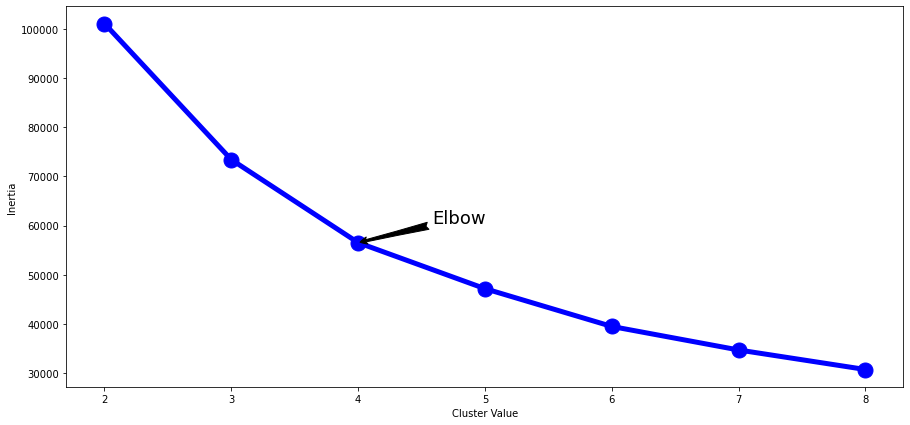

In [13]:
inertias = [experiment.inertia_ for experiment in all_experiments]
plt.figure(figsize=(15,7))
plt.plot([2, 3, 4, 5, 6, 7, 8], inertias, 'bo-', linewidth=5, markersize=15)
#plt.axis([2, 8, 0, 1500])
plt.xlabel('Cluster Value')
plt.ylabel('Inertia')
plt.annotate('Elbow', xy=(4, inertias[2]), xytext=(0.4, 0.4), textcoords='figure fraction', fontsize=18,
             arrowprops=dict(facecolor='black', arrowstyle='fancy'))
plt.show()


## Silhouette Skoru

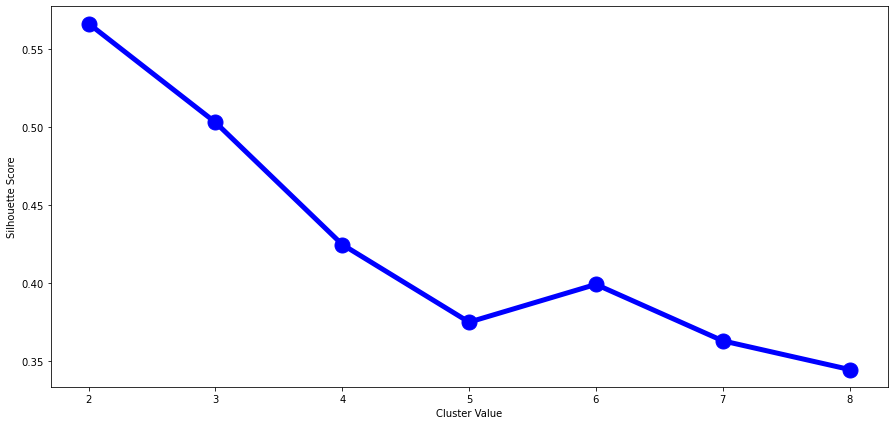

In [14]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, experiment.labels_) for experiment in all_experiments]
plt.figure(figsize=(15, 7))
plt.plot([2, 3, 4, 5, 6, 7, 8], silhouette_scores, 'bo-', linewidth=5, markersize=15)
#plt.axis([2, 8, 0.5, 0.75])
plt.xlabel('Cluster Value')
plt.ylabel('Silhouette Score')
plt.show()

In [16]:
import matplotlib as mpl
import numpy as np

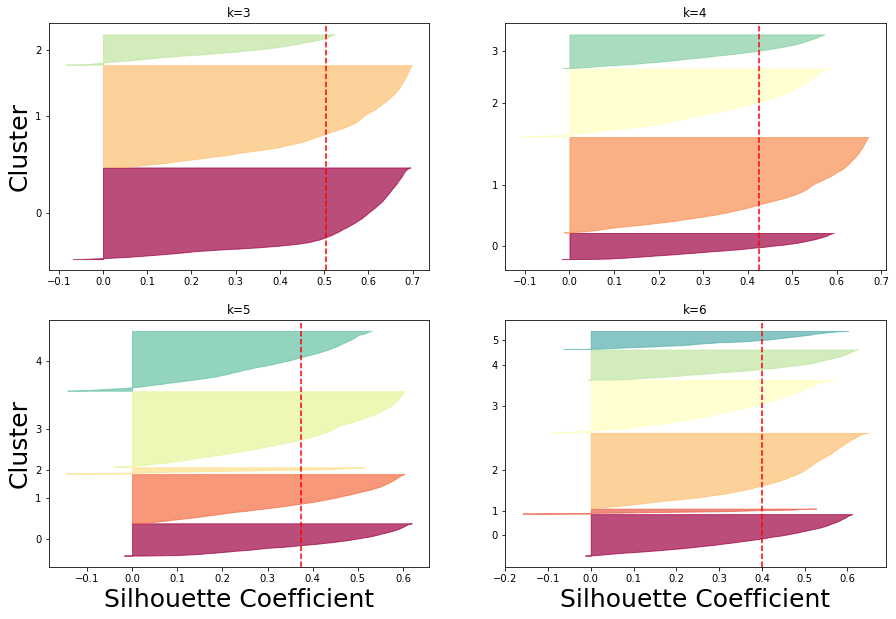

In [17]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
silhouette_coefficients = [silhouette_samples(X, experiment.labels_) for experiment in all_experiments]

plt.figure(figsize=(15,10))

for k in [3,4,5,6]:
    plt.subplot(2,2,k-2)
    padding = 50
    pos = padding
    ticks = []
    labels = all_experiments[k-2].labels_
    for i in range(k):

        coefficients = silhouette_coefficients[k-2][labels == i]
        coefficients.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coefficients)), 0, coefficients,
                          facecolor=color, edgecolor=color, alpha=0.7)
        tick = pos + len(coefficients) // 2
        ticks.append(tick)
        pos += len(coefficients) + padding

    if k in[3,5]:
        plt.ylabel("Cluster", fontsize = 25)


    if k in [5,6]:
        plt.xlabel("Silhouette Coefficient", fontsize = 25)

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.title(f'k={k}')
    plt.axvline(x = silhouette_scores[k-2], color = 'red', linestyle = '--')

plt.show()

_Cluster sayısını 5 olarak almak en iyi seçenek gibi gözüküyor._

Şimdi Cluster Sayısını önce 5, Daha sonrasında diğer cluster sayıları için alacağımız sonuçlara bakalım.

<function matplotlib.pyplot.show(close=None, block=None)>

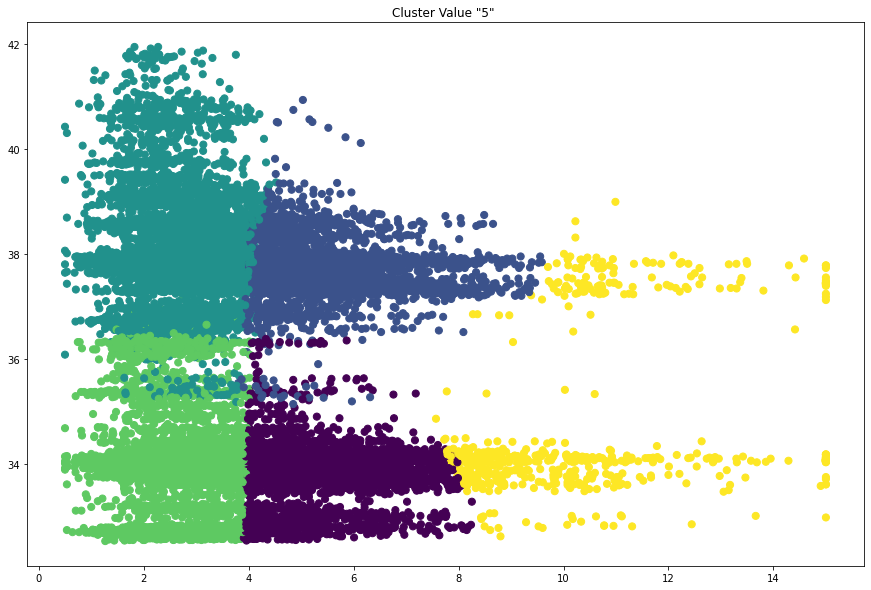

In [52]:
kmeans = KMeans(n_clusters=5)
labels_5 = kmeans.fit_predict(X)
plt.figure(figsize=(15,10))
plt.scatter(X.values[:,0],X.values[:,1],c=labels_5,s=40,cmap='viridis')
plt.title('Cluster Value "5" ')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

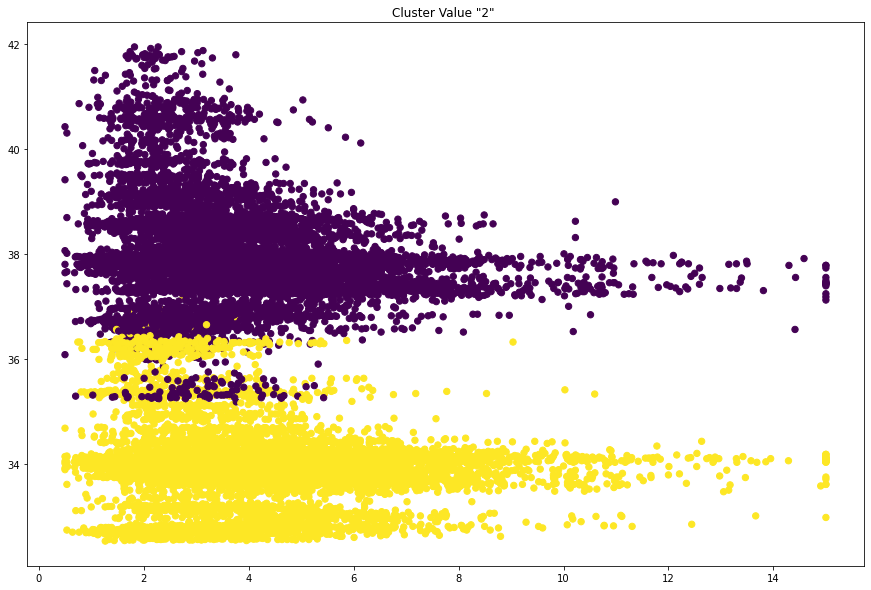

In [53]:
kmeans = KMeans(n_clusters=2)
labels_2 = kmeans.fit_predict(X)
plt.figure(figsize=(15,10))
plt.scatter(X.values[:,0],X.values[:,1],c=labels_2,s=40,cmap='viridis')
plt.title('Cluster Value "2" ')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

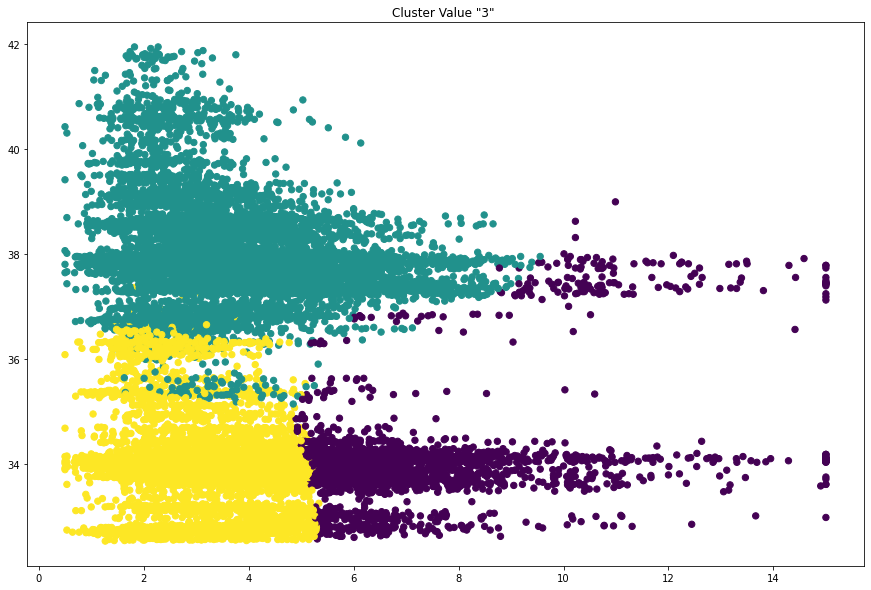

In [54]:
kmeans = KMeans(n_clusters=3)
labels_3 = kmeans.fit_predict(X)
plt.figure(figsize=(15,10))
plt.scatter(X.values[:,0],X.values[:,1],c=labels_3,s=40,cmap='viridis')
plt.title('Cluster Value "3" ')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

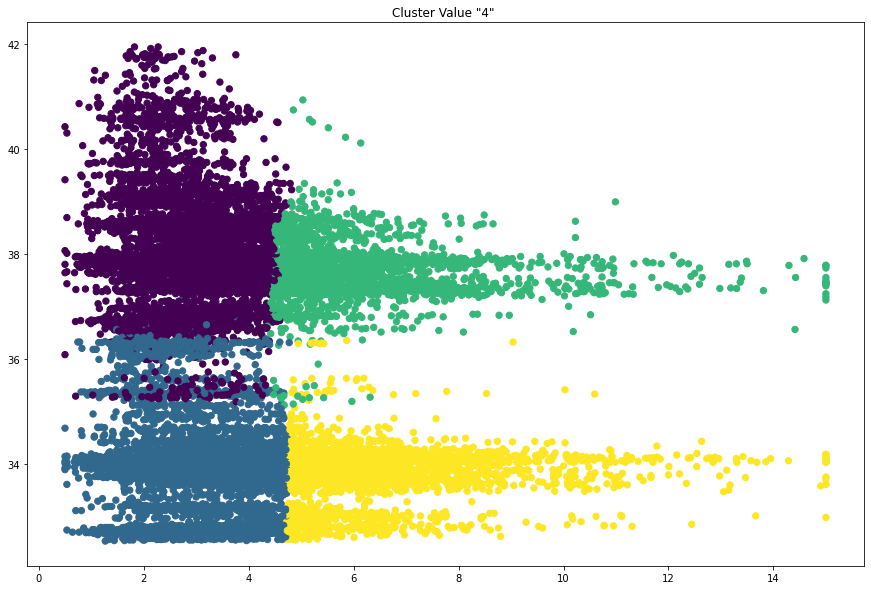

In [55]:
kmeans = KMeans(n_clusters=4)
labels_4 = kmeans.fit_predict(X)
plt.figure(figsize=(15,10))
plt.scatter(X.values[:,0],X.values[:,1],c=labels_4,s=40,cmap='viridis')
plt.title('Cluster Value "4" ')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

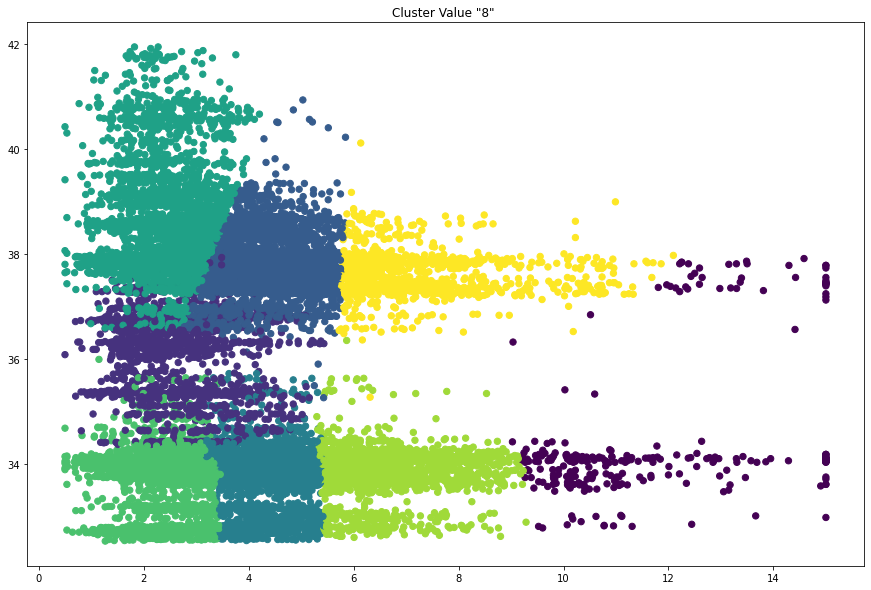

In [56]:
kmeans = KMeans(n_clusters=8)
labels_8 = kmeans.fit_predict(X)
plt.figure(figsize=(15,10))
plt.scatter(X.values[:,0],X.values[:,1],c=labels_8,s=40,cmap='viridis')
plt.title('Cluster Value "8" ')
plt.show